In [ ]:
#@title Kaggle data import

from google.colab import files
#files.upload()
#!mkdir ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json

import kagglehub

#dataset for a convolutional Neural Network
CNN_path = kagglehub.dataset_download("likhon148/animal-data") + '/animal_data'

#dataset for classification model
#Class_path = kagglehub.dataset_download("ehababoelnaga/multiple-disease-prediction")

In [ ]:
#@title CNN data preparation

import sys
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pprint

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, InputLayer, AveragePooling2D
from keras import regularizers
from sklearn.metrics import confusion_matrix

from keras.utils import to_categorical
from sklearn.utils import shuffle

#build dictionary for animal types
animals = {0:'Bear',1:'Bird',2:'Cat',3:'Cow',4:'Deer',5:'Dog',6:'Dolphin',7:'Elephant',8:'Giraffe',9:'Horse',10:'Kangaroo',11:'Lion',12:'Panda',13:'Tiger',14:'Zebra'}
subdirs = list(animals.values())

#Check that all images are of same dimension
shapes = []
for subdir in subdirs:
  path = CNN_path+'/'+subdir+'/'
  current = set()
  for fn in os.listdir(path):
    fig = mpimg.imread(path+fn)
    if fig.shape not in current:
      current.add(fig.shape)
  shapes.append(sorted(current))

for i in range(len(shapes)):
  print(f"Category {animals[i]} has images of shape {shapes[i]}\n")



Category Bear has images of shape [(224, 224, 3)]

Category Bird has images of shape [(224, 224, 3)]

Category Cat has images of shape [(224, 224, 3)]

Category Cow has images of shape [(224, 224, 3)]

Category Deer has images of shape [(224, 224, 3)]

Category Dog has images of shape [(224, 224, 3)]

Category Dolphin has images of shape [(224, 224, 3)]

Category Elephant has images of shape [(224, 224, 3)]

Category Giraffe has images of shape [(224, 224, 3)]

Category Horse has images of shape [(224, 224, 3)]

Category Kangaroo has images of shape [(224, 224, 3)]

Category Lion has images of shape [(224, 224, 3)]

Category Panda has images of shape [(224, 224, 3)]

Category Tiger has images of shape [(224, 224, 3)]

Category Zebra has images of shape [(224, 224, 3)]



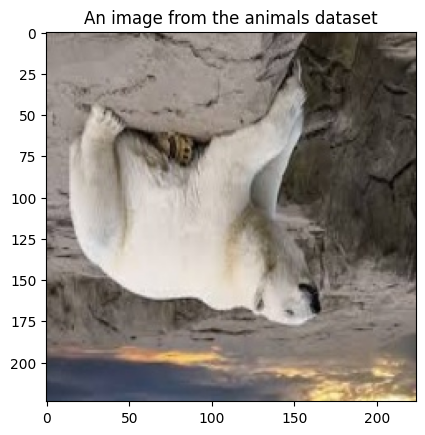

In [ ]:
#@title checking if the images are color or just rgb grayscale

path = CNN_path+'/'+subdirs[0]+'/'
file_path = path+os.listdir(path)[0]
img = mpimg.imread(file_path)
plt.title('An image from the animals dataset')
plt.imshow(img)


All of the images in this dataset are of the same shape so no need to resize. It looks like color will matter so we will not flatten it to grayscale, at least to start. If resizing was necessary, I would implement the following code:

```
from PIL import Image

#create new directory to store resized images to preserve original dataset
for subdir in subdirs:
  path = CNN_path + '/' + subdir + '/'
  newpath = CNN_path + '/' + subdir + '_new/'

  os.makedirs(path_new, exist_ok = True)

  for fn in os.listdir(path):
    img = Image.open(path + fn)
    img_new = img.resize((224, 224))
    img_new.save(newpath + fn)
```

Since we don't need that, we will proceed with importing the dataset.

In [ ]:
X = []
Y = []

#import the images and craft an output variable
for i, subdir in enumerate(subdirs):
  path = CNN_path+'/'+subdir+'/'
  for fn in os.listdir(path):
    X.append(mpimg.imread(path + fn))
    Y.append(i)

Y = to_categorical(Y, num_classes = len(animals))

#convert to numpy arrays
X = np.array(X, dtype = float) / 255.0 #normalizing mixel values
Y = np.array(Y, dtype = int)

#get the shape of X and Y for the models
X_shape = X.shape
Y_shape = Y.shape
print(f"X shape: {X_shape}\nY shape: {Y_shape}")




X shape: (1944, 224, 224, 3)
Y shape: (1944, 15)


In [ ]:
#shuffle values since they are ardered by class
X, Y = shuffle(X, Y, random_state = 2525)

#split dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2525)

In [ ]:
#start with a simple model

animal_CNN_1 = Sequential()
animal_CNN_1.add(InputLayer(input_shape = X_shape[1:]))
animal_CNN_1.add(Conv2D(filters = 32,
                        kernel_size = (3, 3),
                        activation = 'relu',
                        padding = 'same'))
animal_CNN_1.add(MaxPooling2D(pool_size = (2,2)))
animal_CNN_1.add(Dropout(0.5))

animal_CNN_1.add(Conv2D(filters = 64,
                        kernel_size = (3, 3),
                        padding = 'same',
                        activation = 'relu'))
animal_CNN_1.add(MaxPooling2D(pool_size = (2,2)))
animal_CNN_1.add(Dropout(0.5))

animal_CNN_1.add(Flatten())
animal_CNN_1.add(Dense(128, activation = 'relu'))
animal_CNN_1.add(Dropout(0.25))

animal_CNN_1.add(Dense(Y_shape[1], activation = 'softmax'))

animal_CNN_1.compile(loss = 'categorical_crossentropy',
                     optimizer = 'adam',
                     metrics = ['accuracy'])

animal_CNN_1.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,711,567 (98.08 MB)

 Trainable params: 25,711,567 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

Let's visualize this model for fun.

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


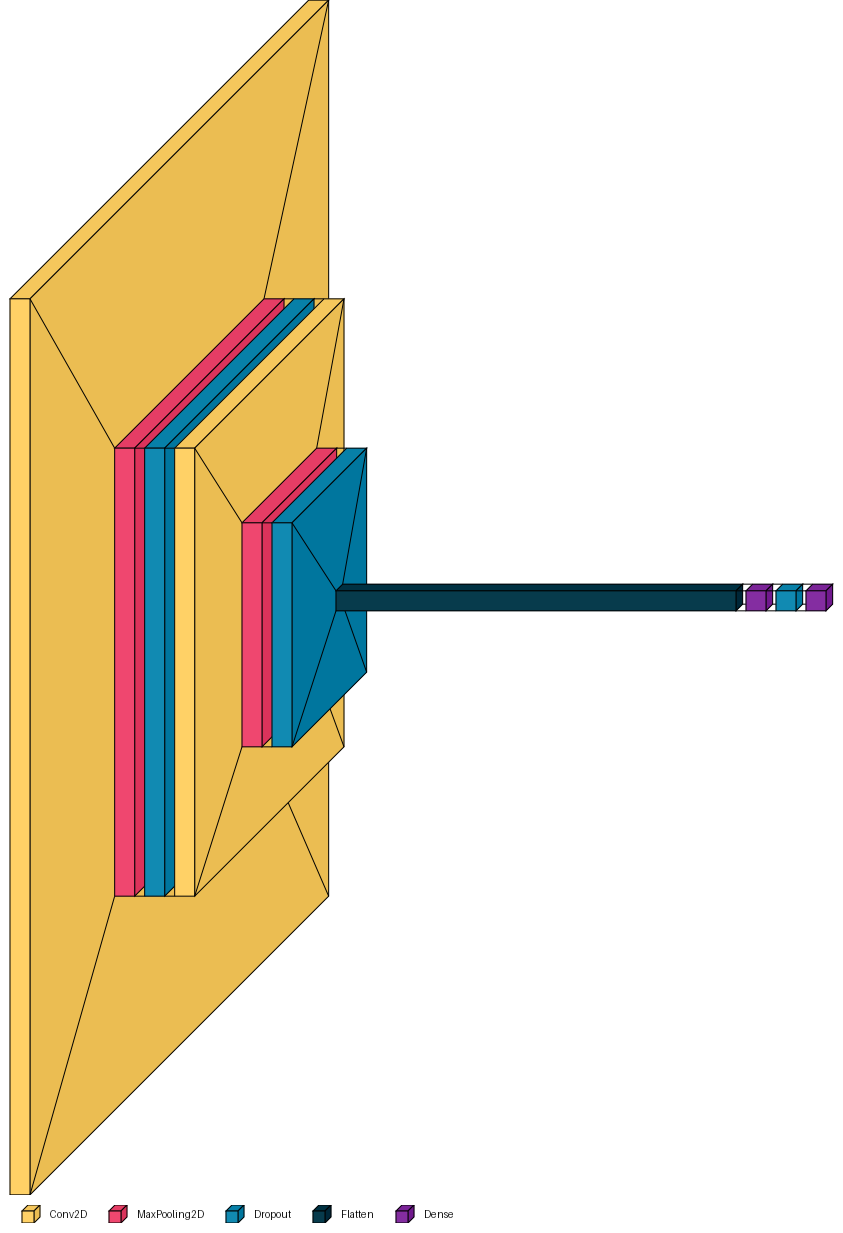

In [ ]:
#!pip install visualkeras
import visualkeras

visualkeras.layered_view(animal_CNN_1, legend = True)

In [ ]:
#@title Training the model

#set hyperparams
epochs = 50
batch_size = 112

#fit model, including validation monitoring to help prevent overfitting
history_CNN_1 = animal_CNN_1.fit(X_train,
                                  Y_train,
                                  epochs = epochs,
                                  batch_size = batch_size,
                                 validation_split = 0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 118s 11s/step - accuracy: 0.0744 - loss: 10.6079 - val_accuracy: 0.0772 - val_loss: 2.7063
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 144s 12s/step - accuracy: 0.1018 - loss: 2.7169 - val_accuracy: 0.0919 - val_loss: 2.7069
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 137s 11s/step - accuracy: 0.1024 - loss: 2.6941 - val_accuracy: 0.1250 - val_loss: 2.6935
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 157s 13s/step - accuracy: 0.1021 - loss: 2.6630 - val_accuracy: 0.1250 - val_loss: 2.6634
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 128s 11s/step - accuracy: 0.1331 - loss: 2.6149 - val_accuracy: 0.1140 - val_loss: 2.6147
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 143s 12s/step - accuracy: 0.1598 - loss: 2.5607 - val_accuracy: 0.1324 - val_loss: 2.5874
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 138s 11s/step - accuracy: 0.1698 - loss: 2.5279 - val_accuracy: 0.1397 - val_loss: 2.5844
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 11s/step - accuracy: 0.2241 - loss: 2.4544 - val_accuracy: 0

In [ ]:
#check metrics on test data and plot accuracy curve

anima_acc_1 = history_CNN_1.history['accuracy']

epochs_ind = [i for i in range(1, 1 + epochs)]

plt.plot(epochs_ind, anima_acc_1, 'blue', label = 'Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over training epochs')
plt.legend()
plt.show()

In [ ]:
_, train_acc = animal_CNN_1.evaluate(X_train, Y_train, verbose = 0)
_, test_acc = animal_CNN_1.evaluate(X_test, Y_test, verbose = 0)

print(f"Training accuracy: {train_acc*100}%")
print(f"Testing accuracy: {test_acc*100}%")

Training accuracy: 92.35293865203857%
Testing accuracy: 64.04109597206116%


Training accuracy: 92.35293865203857%

Testing accuracy: 64.04109597206116%

43/43 ━━━━━━━━━━━━━━━━━━━━ 36s 841ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 15s 793ms/step


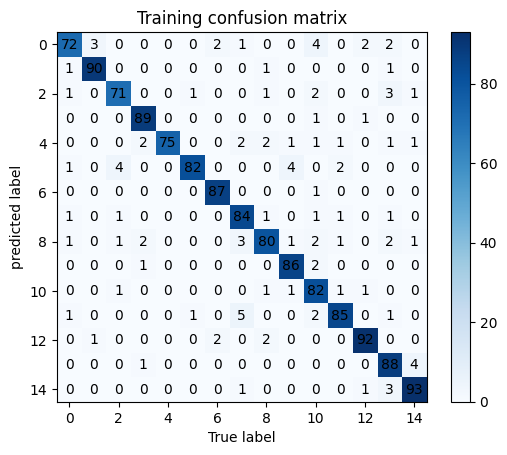

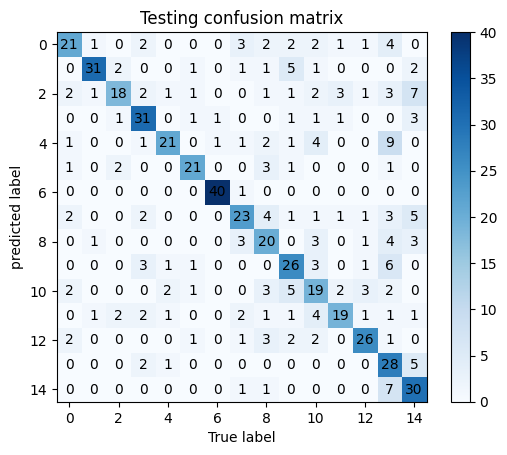

In [ ]:
#confusion matrix

train_preds = np.argmax(animal_CNN_1.predict(X_train), axis = 1)
test_preds = np.argmax(animal_CNN_1.predict(X_test), axis = 1)

train_cm = confusion_matrix(np.argmax(Y_train, axis = 1), train_preds)
test_cm = confusion_matrix(np.argmax(Y_test, axis = 1), test_preds)

plt.imshow(train_cm, cmap = plt.cm.Blues)
plt.colorbar()
for i in range(train_cm.shape[0]):
  for j in range(train_cm.shape[1]):
    plt.text(j, i, train_cm[i, j], ha = 'center', va = 'center')
plt.title('Training confusion matrix')
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.show()

plt.imshow(test_cm, cmap = plt.cm.Blues)
plt.colorbar()
for i in range(test_cm.shape[0]):
  for j in range(test_cm.shape[1]):
    plt.text(j, i, test_cm[i, j], ha = 'center', va = 'center')
plt.title('Testing confusion matrix')
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.show()

This model has significant overfitting present, and additionally took a very long time to complete fitting. I will try a new model architecture which should reduce total parameters and account for some of the overfitting present.

In [ ]:
from keras.layers import GlobalAveragePooling2D
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation

animal_CNN_2 = Sequential()
animal_CNN_2.add(InputLayer(input_shape = X_shape[1:]))
animal_CNN_2.add(Conv2D(filters = 32,
                        kernel_size = (3, 3),
                        activation = None,
                        padding = 'same',
                        kernel_regularizer = regularizers.l2(0.001)))
animal_CNN_2.add(BatchNormalization())
animal_CNN_2.add(Activation('relu'))
animal_CNN_2.add(MaxPooling2D(pool_size = (2,2)))
animal_CNN_2.add(Dropout(0.25))

animal_CNN_2.add(Conv2D(filters = 32,
                        kernel_size = (3, 3),
                        padding = 'same',
                        activation = None,
                        kernel_regularizer = regularizers.l2(0.001)))
animal_CNN_2.add(BatchNormalization())
animal_CNN_2.add(Activation('relu'))
animal_CNN_2.add(MaxPooling2D(pool_size = (2,2)))
animal_CNN_2.add(Dropout(0.25))

animal_CNN_2.add(GlobalAveragePooling2D())
animal_CNN_2.add(Dense(128,
                       activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001)))
animal_CNN_2.add(Dropout(0.25))

animal_CNN_2.add(Dense(Y_shape[1], activation = 'softmax'))

optimizer = Adam(learning_rate = 0.005, amsgrad = True)

animal_CNN_2.compile(loss = 'categorical_crossentropy',
                     optimizer = optimizer,
                     metrics = ['accuracy'])

animal_CNN_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,559 (64.68 KB)

 Trainable params: 16,431 (64.18 KB)

 Non-trainable params: 128 (512.00 B)

This clearly has significantly fewer parameters so should reduce the overfitting we saw in the earlier iteration. I will conduct this with more epochs as it should also run much faster.

In [ ]:
#hyper parameters
epochs = 75
batch_size = 128
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
history_CNN_2 = animal_CNN_2.fit(X_train,
                                  Y_train,
                                  epochs = epochs,
                                  batch_size = batch_size,
                                 validation_split = 0.2)

Epoch 1/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 123s 13s/step - accuracy: 0.0926 - loss: 2.8812 - val_accuracy: 0.0993 - val_loss: 2.7655
Epoch 2/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 145s 14s/step - accuracy: 0.1392 - loss: 2.6800 - val_accuracy: 0.1066 - val_loss: 2.7679
Epoch 3/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 143s 14s/step - accuracy: 0.1726 - loss: 2.6112 - val_accuracy: 0.1140 - val_loss: 2.7658
Epoch 4/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 143s 14s/step - accuracy: 0.2055 - loss: 2.5161 - val_accuracy: 0.1213 - val_loss: 2.7637
Epoch 5/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 119s 13s/step - accuracy: 0.2242 - loss: 2.4757 - val_accuracy: 0.1397 - val_loss: 2.7504
Epoch 6/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 148s 14s/step - accuracy: 0.2105 - loss: 2.4522 - val_accuracy: 0.1029 - val_loss: 2.7351
Epoch 7/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 126s 14s/step - accuracy: 0.2259 - loss: 2.4147 - val_accuracy: 0.0735 - val_loss: 2.8468
Epoch 8/75
9/9 ━━━━━━━━━━━━━━━━━━━━ 120s 13s/step - accuracy: 0.2356 - loss: 2.3726 - val_accuracy: 0.0699 - val_loss:

ValueError: x and y must have same first dimension, but have shapes (75,) and (13,)

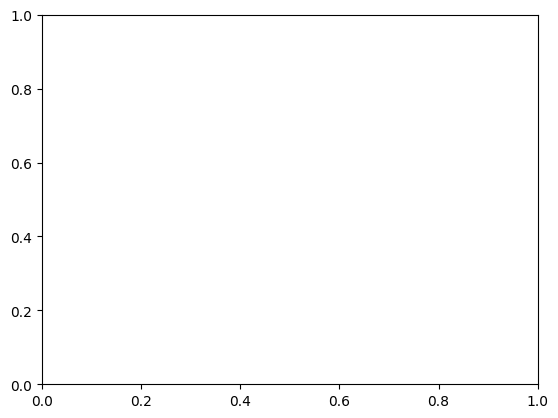

In [ ]:
#check metrics on test data and plot accuracy curve

animal_acc_2 = history_CNN_2.history['accuracy']

epochs_ind = [i for i in range(1, 1 + epochs)]

plt.plot(epochs_ind, animal_acc_2, 'blue', label = 'Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over training epochs')
plt.legend()
plt.show()

In [ ]:
_, train_acc = animal_CNN_2.evaluate(X_train, Y_train, verbose = 0)
_, test_acc = animal_CNN_2.evaluate(X_test, Y_test, verbose = 0)

print(f"Training accuracy: {train_acc*100}%")
print(f"Testing accuracy: {test_acc*100}%")

In [ ]:
#confusion matrix

train_preds = np.argmax(animal_CNN_2.predict(X_train), axis = 1)
test_preds = np.argmax(animal_CNN_2.predict(X_test), axis = 1)

train_cm = confusion_matrix(np.argmax(Y_train, axis = 1), train_preds)
test_cm = confusion_matrix(np.argmax(Y_test, axis = 1), test_preds)

plt.imshow(train_cm, cmap = plt.cm.Blues)
plt.colorbar()
for i in range(train_cm.shape[0]):
  for j in range(train_cm.shape[1]):
    plt.text(j, i, train_cm[i, j], ha = 'center', va = 'center')
plt.title('Training confusion matrix')
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.show()

plt.imshow(test_cm, cmap = plt.cm.Blues)
plt.colorbar()
for i in range(test_cm.shape[0]):
  for j in range(test_cm.shape[1]):
    plt.text(j, i, test_cm[i, j], ha = 'center', va = 'center')
plt.title('Testing confusion matrix')
plt.xlabel('True label')
plt.ylabel('predicted label')
plt.show()